In [2]:
%run "/home/usriniva/uller_modified/discrete_time/Hanna_simu/simulation/impport_packages.ipynb"    #import all necessary packages - numpy, pandas etc


#### Starting point -3, epigenetics

In [8]:
# Folder path
folder_path = "/home/usriniva/uller_modified/discrete_time/Hanna_simu/results/long_time"
dim_objnames_epi= {}

for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith(".pkl"):
        
        file_path = os.path.join(folder_path, filename)
        print(f"Loading: {filename}")
        
        # Load the pickle file
        with open(file_path, "rb") as file:
            data = pickle.load(file)
            
        nof_dims = re.findall(r'[0-9]+', filename)[0]
        name= f'epi_{nof_dims}'
        dim_objnames_epi[name] = data
        
        print(f"Loaded {filename} into {name}")

Loading: results_dim5.pkl
Loaded results_dim5.pkl into epi_5


In [9]:
globals().update(dim_objnames_epi) # neat way to unpack variables


# Sort the keys numerically by extracting the number from each name
sorted_epi_keys = sorted(dim_objnames_epi.keys(), key=lambda x: int(re.findall(r'\d+', x)[0]))



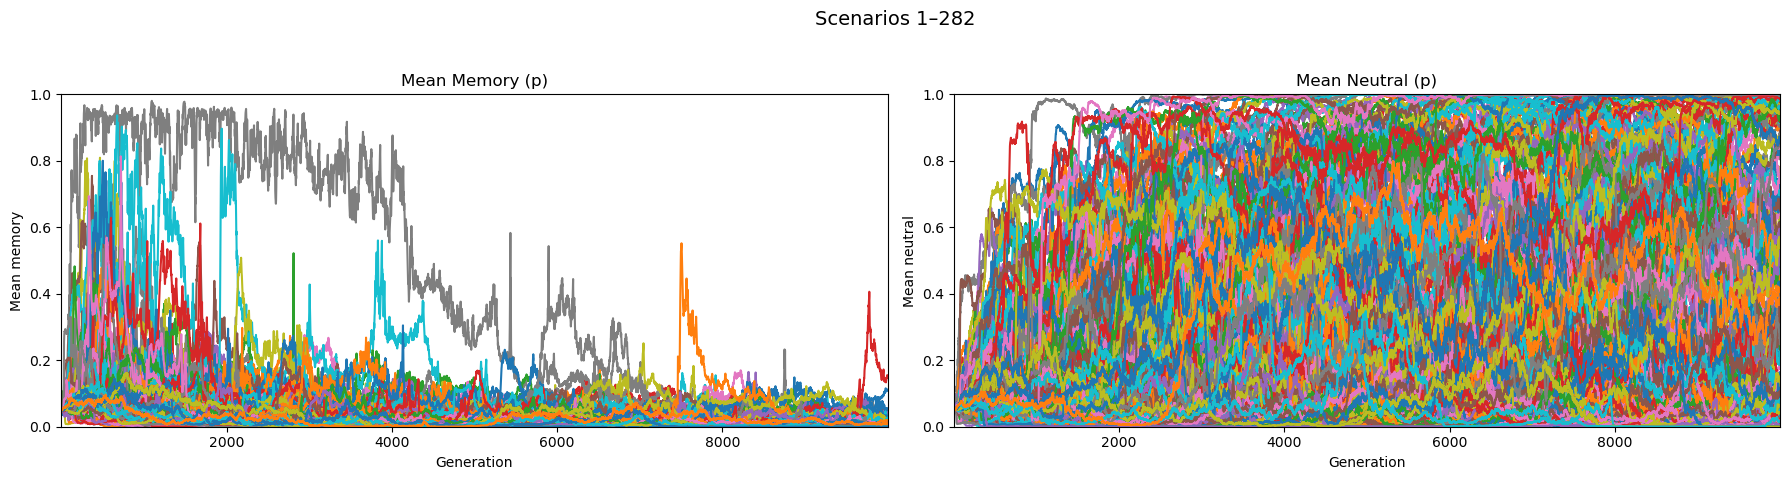

In [10]:
data = epi_5
start = 1

# Extract variables
meanmemory_p = data['meanmemory_p'][:, :-1]
meanneutral_p = data['meanneutral_p'][:, :-1]


nof_scenarios = meanmemory_p.shape[0]
maxgen = meanmemory_p.shape[1]

# Create figure once (outside loop)
fig, ax = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

# Loop over scenarios
for i in range(start, nof_scenarios):  
    # Left plot: mean memory
    ax[0].plot(meanmemory_p[i, :])

    # Right plot: mean neutral
    ax[1].plot(meanneutral_p[i, :])

# Add labels, limits, and legends once
ax[0].set_title("Mean Memory (p)")
ax[0].set_ylabel("Mean memory")
ax[0].set_xlabel("Generation")
ax[0].set_xlim(1, maxgen)
ax[0].set_ylim(0, 1)

ax[1].set_title("Mean Neutral (p)")
ax[1].set_ylabel("Mean neutral")
ax[1].set_xlabel("Generation")
ax[1].set_xlim(1, maxgen)
ax[1].set_ylim(0, 1)

fig.suptitle(f"Scenarios {start}–{nof_scenarios - 1}", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


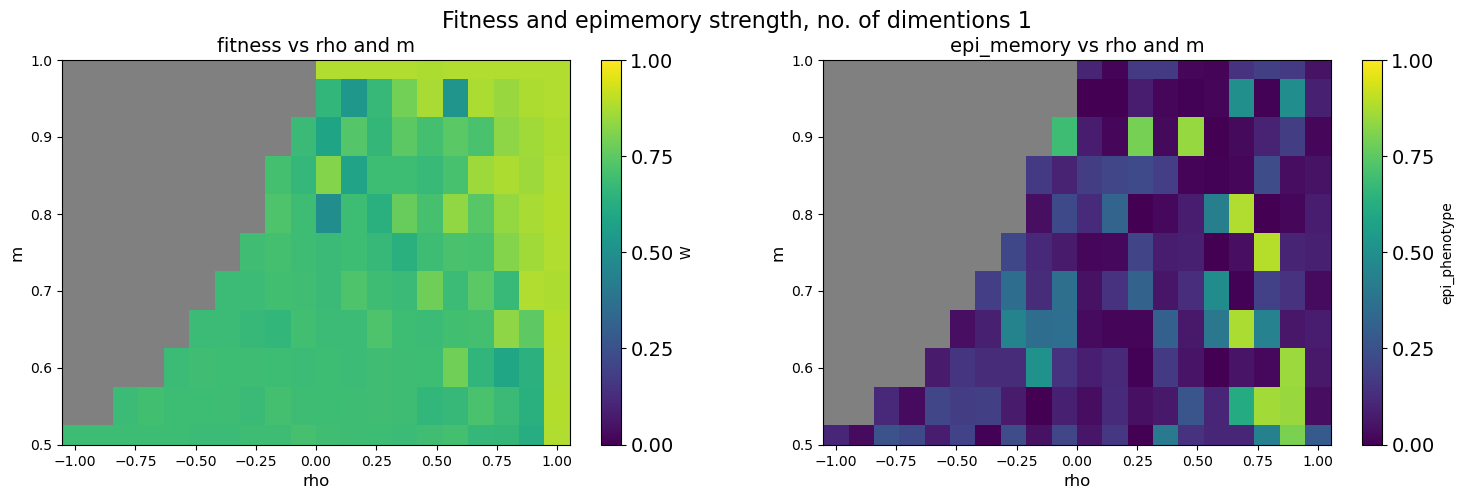

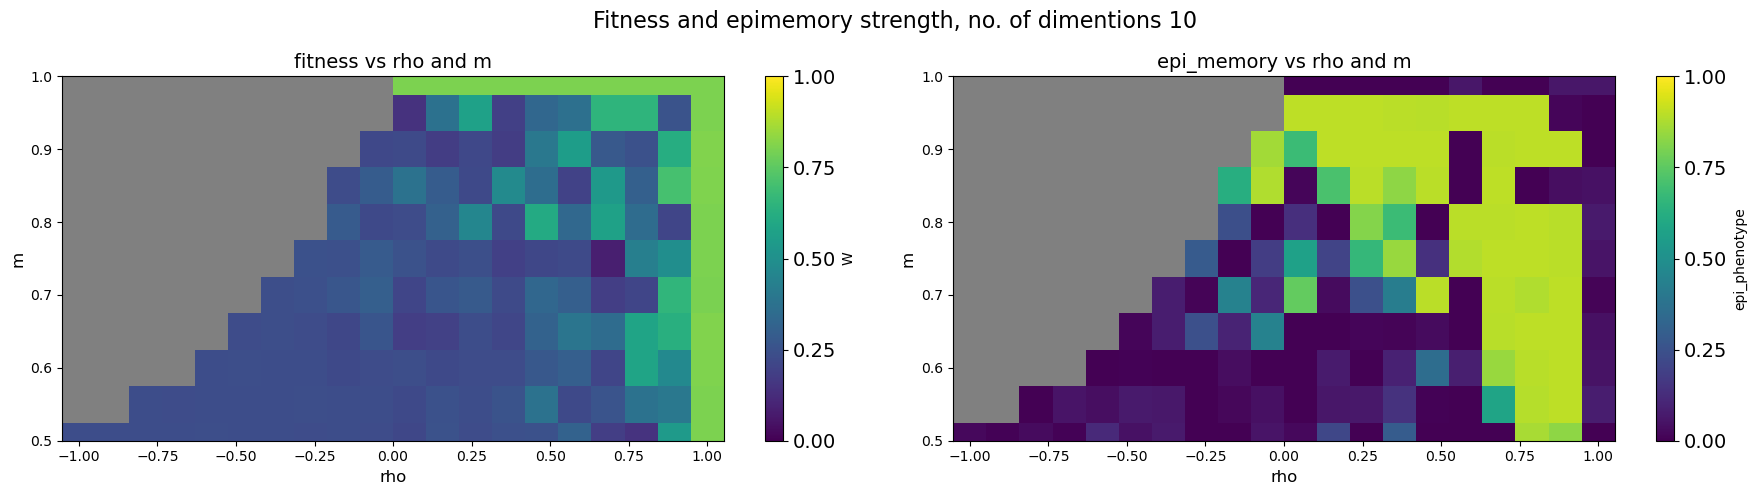

In [7]:
for dim_name in sorted_epi_keys:
    
    dim = globals()[dim_name]
    
    nof_dims = re.findall(r'[0-9]+', dim_name)[0]
        
    rho_ext, m_ext = np.meshgrid(dim['rho_m_alpha_beta'][:,0],dim['rho_m_alpha_beta'][:,1])

    df = pd.DataFrame({
        
    'rho': dim['rho_m_alpha_beta'][:,0],
    'm': dim['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim['meanw'][:,-10:], axis=1),
    'epi_mem_p': np.mean(dim['meanmemory_p'][:,-10:], axis=1)   
    
    })

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(f"Fitness and epimemory strength, no. of dimentions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()  # copy to modify safely
    cmap.set_bad(color='gray')    # gray for masked values
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # consistent color range

    # --- Plot 1: fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm1 = ax[0].pcolormesh(
        pivoted_fitness.columns,    # X (m)
        pivoted_fitness.index,      # Y (rho)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar1 = fig.colorbar(pcm1, ax=ax[0], label='W', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar1.ax.tick_params(labelsize=14)
    ax[0].set_xlabel('rho', fontsize=12)
    ax[0].set_ylabel('m', fontsize=12)
    ax[0].set_ylim(0.5,1)
    ax[0].set_title('fitness vs rho and m', fontsize=14)

    # --- Plot 2: epi_mem_p ---
    pivoted_epi = df.pivot_table(
        index='m',
        columns='rho',
        values='epi_mem_p'
    ).sort_index().sort_index(axis=1)

    pcm2 = ax[1].pcolormesh(
        pivoted_epi.columns, 
        pivoted_epi.index,
        pivoted_epi.values,
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar2 = fig.colorbar(pcm2, ax=ax[1], label=r'epi_phenotype', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar2.ax.tick_params(labelsize=14)
    ax[1].set_xlabel('rho', fontsize=12)
    ax[1].set_ylabel('m', fontsize=12)
    ax[1].set_ylim(0.5,1)
    ax[1].set_title('epi_memory vs rho and m', fontsize=14)

plt.tight_layout()
plt.show()